In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('eda_cleaned_data.csv',index_col=0)

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_ys,sql_ys,excel_ys,spark_ys,r_ys,same_state,simplified_title,seniority,desc_length,no_of_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\r\r\nLocation: Albuquerque, N...",3.8,Tecolote Research\r\r\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,1,0,0,0,data scientist,na,2574,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\r\r\n\r\r\r\nI. General Su...,3.4,University of Maryland Medical System\r\r\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,data scientist,senior,4873,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\r\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,1,1,0,1,data scientist,na,3529,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\r\r\nJob ID: 3107...,3.8,PNNL\r\r\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,1,director,senior,3969,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\r\r\nAffinity Solutions / Mar...,2.9,Affinity Solutions\r\r\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,1,0,0,1,data scientist,senior,2768,3


# Model Building task
1. choose relevant columns<br>
2. get dummy data<br>
3. train test split<br>

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'per_hour', 'company_name', 'jobs_state', 'company_age', 'python_ys',
       'sql_ys', 'excel_ys', 'spark_ys', 'r_ys', 'same_state',
       'simplified_title', 'seniority', 'desc_length', 'no_of_comp'],
      dtype='object')

In [16]:
# relevant columns
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue', 'no_of_comp','employer_provided',
         'per_hour', 'jobs_state','same_state','company_age', 'python_ys','sql_ys', 'excel_ys', 'spark_ys', 
         'simplified_title', 'seniority', 'desc_length']]

In [17]:
#get dummy data
df_dum = pd.get_dummies(df_model)

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building 

In [21]:
# multiple regression
import statsmodels.api as sm

In [22]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     5.159
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           6.01e-46
Time:                        17:38:03   Log-Likelihood:                -3447.9
No. Observations:                 742   AIC:                             7180.
Df Residuals:                     600   BIC:                             7834.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                32.2151      8.513      3.784      0.000      15.497      48.933
Rating                                                5.7177      2.339      2.444      0.015       1.124      10.312
no_of_comp                                            2.6393      1.052      2.508      0.012       0.572       4.706
employer_provided                                    48.6675     13.790      3.529      0.000      21.584      75.751
per_hour                                            -36.4108     11.064     -3.291      0.001     -58.140     -14.681
same_state                                            4.1693      3.183      1.310      0.191      -2.082      10.420
company_age                                           0.0011      0.036      0.030      0.976      -0.070       0.073
python_ys                                            14.2187      3.083      4.612      0.000       8.164      20.273
sql_ys                                               -6.9368      3.045     -2.278      0.023     -12.917      -0.956
excel_ys                                             -7.1810      2.706     -2.654      0.008     -12.496      -1.866
spark_ys                                             -0.7777      3.328     -0.234      0.815      -7.314       5.759
desc_length                                        3.064e-05      0.001      0.034      0.973      -0.002       0.002
Size_-1                                               5.5356     10.345      0.535      0.593     -14.780      25.852
Size_1 to 50 employees                               -0.1063      7.771     -0.014      0.989     -15.368      15.156
Size_10000+ employees                                 6.1467      6.840      0.899      0.369      -7.286      19.579
Size_1001 to 5000 employees                          11.0850      4.660      2.379      0.018       1.933      20.237
Size_201 to 500 employees                             1.0868      4.676      0.232      0.816      -8.096      10.269
Size_5001 to 10000 employees                          0.2267      6.596      0.034      0.973     -12.728      13.182
Size_501 to 1000 employees                           -0.5981      4.883     -0.122      0.903     -10.188       8.992
Size_51 to 200 employees                              2.1745      5.256      0.414      0.679      -8.148      12.497
Size_Unknown                                          6.6642     16.776      0.397      0.691     -26.283      39.612
Type of ownership_-1                                  5.5356     10.345      0.535      0.593     -14.780      25.852
Type of ownership_College / University               13.9213     21.108      0.660      0.510     -27.534      55.377
Type of ownersh

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error'))

-25.931939556605517

In [33]:
# lasso regression 
from sklearn.linear_model import Lasso
lm_l = Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error'))

-24.51587439609985

C:\Users\Harsh Jain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


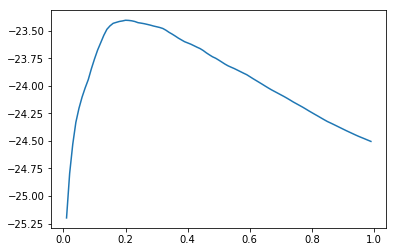

In [39]:
# model tuning 
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error')))
plt.plot(alpha,error)

In [50]:
# optimal alpha value
err = list(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
19,0.2,-23.405412


In [48]:
#tuned model 
lm_l = Lasso(alpha=0.2)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error'))

-23.40541188022745

In [56]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [57]:
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error'))

-18.592187099420602

In [58]:
# tune model using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-17.4464586846543
{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 50}


In [59]:
# test 
pred_lm = lm.predict(X_test)
pred_lm_l = lm_l.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, pred_lm))
print(mean_absolute_error(y_test, pred_lm_l))
print(mean_absolute_error(y_test, pred_rf))

24.922369544605036
25.476173950365357
14.295234899328857


In [62]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)